# 2. Rewewal Process: Lognormal distribution

(-0.1, 1.059910918148737)

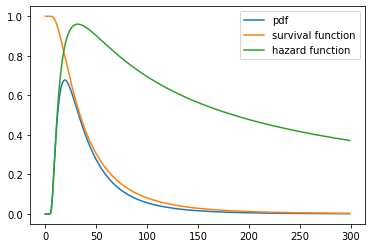

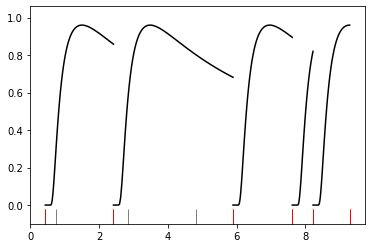

In [16]:
from sympy import symbols, Eq, solve, exp, sqrt 
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import numpy as np
import Correlated_Poisson_Process as pp

rate = 5
cv = 1
T = 10
mu, s = symbols('mu, s')
a = Eq(exp(mu + s**2 * 0.5), 1/rate)
b = Eq(sqrt(exp(s**2)-1), cv)
result = solve([a,b],(mu,s))

mu = float(result[1][0])
s = float(result[1][1])

x = np.linspace(0, T, 300)
pdf = lognorm.pdf(x, s,exp(mu))
sf = lognorm.sf(x, s, exp(mu))
h = pdf / sf
plt.plot(pdf, label = 'pdf')
plt.plot(sf, label = 'survival function')
plt.plot(h, label = 'hazard function')
plt.legend()
    
def h_logn(t):
    pdf = lognorm.pdf(t, s,exp(mu))
    sf = lognorm.sf(t, s, exp(mu))
    return pdf / sf
    
    # p = (np.log(t)- mu) / s
    # n = 1/(s * t * np.sqrt(2 * np.pi)) * exp(0.5 * np.power(p,2))
    # d = 1 - 
R_m = max(h_logn(x))

marked_processes= pp.generate_markedProcess([0.2,0.2,0.3,0.3,0.4,0.4,0.1], 10)
correlated_spike_trains = pp.markedProcess_to_correlatedST(marked_processes)
S = correlated_spike_trains[0] # S is one spike train from 3 correlated neurons

n = len(S)
U = np.random.uniform(0,R_m, n) # to store all the random U values, just for validation
Hs = [] # to store all the returned values from hazard function, just for validation
t_latest = S[0] 
new_S = [t_latest]
for i in range(1,n):
    Hs.append(S[i]-t_latest)
    if U[i] <= h_logn([S[i]-t_latest]):
        t_latest = S[i]
        new_S.append(t_latest)
        
plt.figure()
# plot the hazard function
for i in range(len(new_S)-1):
    x = np.linspace(new_S[i], new_S[i+1], 100)
    plt.plot(x, h_logn(x-new_S[i]), c = 'k')
# plot the last part of harzard function, where it equals 0
x_tail = np.linspace(new_S[-1], S[-1], 50)
plt.plot(x_tail, h_logn(x_tail-new_S[-1]), c = 'k')
# plot the spikes
y= np.empty(len(S))
y.fill(-0.1) 
y_new = np.empty(len(new_S))
y_new.fill(-0.1) 
plt.plot(S, y, marker = '|', linestyle = '', markersize=30, c = 'gray')
plt.plot(new_S, y_new, marker = '|', linestyle = '', markersize=30, c = 'r')
plt.ylim(-0.1, R_m+0.1)
